In [2]:
import matplotlib.pyplot as plt
import os
import math as m
import numpy as np
from scipy.optimize import curve_fit

In [3]:
def errorbar(filename, no_of_mass):
    #Error bar calculations:
    f = open(filename, "r")
    mass_number = []
    for line in f:
        if line.find("#mass")>=0:
            tmp = line[5:].split(":")
            tmp.append(":")
            tmp = tmp[0].strip()+tmp[-1]+tmp[1].strip()
            mass_number.append(tmp)
    f.close()

    iterations = [int(i.split(":")[-1]) for i in mass_number]

    f = open(filename, "r")
    start = False
    no_of_times = 0
    raw_datas = []
    for line in f:
        if not line[0]=="#" and not line == "\n":
            line.strip()
            tmp = line.split()
            if tmp[0]=="ALL:":
                start = True
                continue
            if start:
                no_of_times += 1
                raw_datas.append(line.strip())
    f.close()
    no_of_datas_for_each_iterations = int(no_of_times/sum(iterations))


    values = []
    for datas in raw_datas:
        values.append(datas.split())
    values = [[float(i) for i in j] for j in values]

    #Separating data set for every iteration for all masses combined
    all_datas = []
    total =  no_of_datas_for_each_iterations
    for j in range(sum(iterations)):
        i = j*total
        all_datas.append(values[i:i+total])

    # Giving the data sets according to the iterations for each mass separately
    # The mass variables are stored like a dictionary
    samples = {}
    for i in range(no_of_mass):
        samples["mass_sample_{}".format(i)] = []

    k,l = 0, -1
    for i in iterations:
        l += 1
        for j in range(i):
            samples["mass_sample_{}".format(l)].append(all_datas[k])
            k += 1

    # Getting all the ion counts and also calculating the mean of it for the iteration number of times
    k = 0
    data_run = no_of_datas_for_each_iterations
    mass_count_avg, all_mass_count = [], []

    for i in iterations:

        if i>1:
            to_avg = [[samples["mass_sample_{}".format(k)][j][m][2] for m in range(data_run)] for j in range(i)]
            all_mass_count.append(to_avg)
            mass = [[to_avg[l][j] for l in range(i)] for j in range(data_run)]
            mass_count = [sum(mass[j])/i for j in range(len(mass))]
            mass_count_avg.append(mass_count)
        k += 1

    # Calculating varience
    more_iterations_count = 0
    for i in iterations:
        if i>1:
            more_iterations_count += 1

    varience_adder, varience_collector, varience = [],[],[]

    for i in range(more_iterations_count):

        for j in range(data_run):

            for k in range(len(all_mass_count[i])):
                x, mu = all_mass_count[i][k][j], mass_count_avg[i][j]
                varience_adder.append((x-mu)**2)

            varience_collector.append(sum(varience_adder)/(len(varience_adder)-1))
            varience_adder = []

        varience.append(varience_collector)
        varience_collector = []

    #Standard deviations and standard error
    no_of_moreiterations = []
    for i in iterations:
        if i>1:
            no_of_moreiterations.append(i)

    standard_deviation = [[m.sqrt(i) for i in varience[j]] for j in range(len(varience))]
    standard_error = [[i/m.sqrt(no_of_moreiterations[j]) for i in standard_deviation[j]] for j in range(len(standard_deviation))]
    
    return standard_error, iterations, samples

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in log


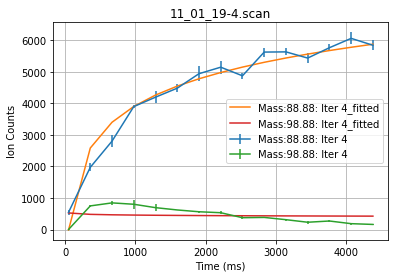

In [50]:
filename = "11_01_19-4.scan"
datas = []
f = open(filename, "r")

for line in f:
    if not line[0] == "#" and not line == "\n":
        a = line.split()
        datas.append(a)
        if line.strip() == "ALL:":
            del datas[-1]
            break
no_of_mass = len(datas[0])-2

f.close()

d = {}

for i in range(no_of_mass):
    d["mass_#{0}".format(i)] = []

for i in range(len(d)):
    d['mass_#{}'.format(i)] = [float(j[i+1]) for j in datas]

time = [float(i[0]) for i in datas]

error, iterations, mass_values = errorbar(filename, no_of_mass)
tmp = []
if len(error[0])>len(time):
    for i in error:
        del i[-1]
        tmp.append(i)
    error = tmp

def fit(x, a, b, c):
    return a*np.log(b*x)+c

j = 0
for i in range(no_of_mass):
    if iterations[i]>1:
        lg = "Mass:"+str(mass_values["mass_sample_{}".format(i)][0][0][0])+": Iter "+str(iterations[i])
        plt.errorbar(time, d["mass_#{}".format(i)], yerr = error[j], fmt = "-", 
                     label = lg)
        
        params, pcov = curve_fit(fit, np.array(time), np.array(d["mass_#{}".format(i)]), p0=(1, 1, 1))
        plt.plot(np.array(time), fit(np.array(time), *params), label = lg+"_fitted")

        j += 1
        
plt.grid(True)
plt.xlabel("Time (ms)")
plt.ylabel("Ion Counts")
plt.legend()
plt.title(filename)
plt.savefig(filename+".png")
plt.show()
plt.close()

In [5]:
len(error), no_of_mass, iterations

(2, 3, [1, 4, 4])

<ErrorbarContainer object of 3 artists>

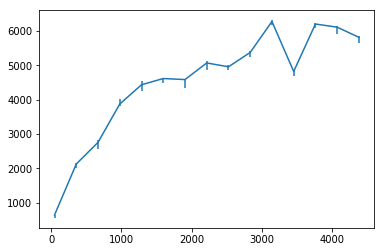

In [6]:
plt.errorbar(time, d["mass_#0"], error)
#plt.errorbar(time, d["mass_#0"], error,'-s','MarkerSize',10,'MarkerEdgeColor','red','MarkerFaceColor','red')

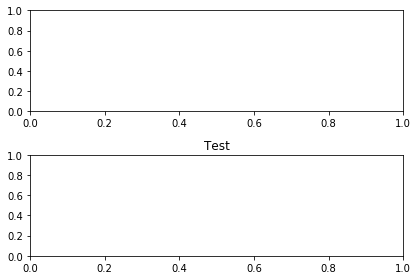

In [7]:
fig = plt.figure()
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
ax2.set_title("Test")
plt.tight_layout()
#ax3 = plt.subplot(223)

<ErrorbarContainer object of 3 artists>

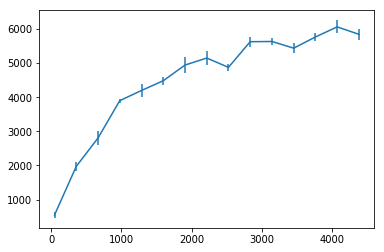

In [8]:
plt.errorbar(time, d["mass_#1"], yerr = error[0])

[ -22.56561863 1396.44503805  777.1847121 ]
[ -22.56561863 1396.44503805  777.1847121 ]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


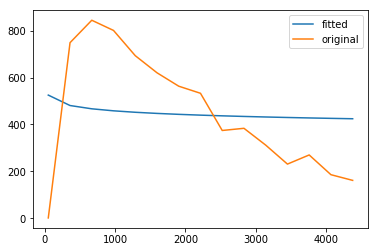

In [31]:

plt.plot(time, d["mass_#2"],
         label='original')
plt.legend()

In [ ]:
print(type(*time))

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

# MatPlotlib
import matplotlib.pyplot as plt
from matplotlib import pylab

# Scientific libraries
import numpy as np
from scipy.optimize import curve_fit

x = np.array([399.75, 989.25, 1578.75, 2168.25, 2757.75, 3347.25, 3936.75, 4526.25, 5115.75, 5705.25])
y = np.array([109,62,39,13,10,4,2,0,1,2])

def exponenial_func(x, a, b, c):
    return a*np.exp(-b*x)+c


#popt, pcov = curve_fit(exponenial_func, x, y, p0=(1, 1e-6, 1))

#xx = np.linspace(300, 6000, 1000)
#yy = exponenial_func(xx, *popt)


plt.plot(x,y)
plt.plot(xx,yy)
#plt.plot(x,y,'o', xx, yy)
pylab.title('Exponential Fit')

#ax = plt.gca()
#ax.set_axis_bgcolor((0.898, 0.898, 0.898))
#fig = plt.gcf()
#py.plot_mpl(fig, filename='Exponential-Fit-with-matplotlib')

In [ ]:
x

In [ ]:
time  = np.array(time)

In [ ]:
time